In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd
import numpy as np 

import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

from datetime import datetime

#from sklearn import preprocessing

from olist.order import Order
#from olist.seller import Seller
from olist.seller_updated_solution import Seller

from olist.data import Olist
from olist.data import Olist
from olist.order import Order

In [3]:
def it_costs(total_revenue_from_seller):
    
    a  = 3157.27
    b = 978.23
    number_sellers = total_revenue_from_seller['seller_id'].count()
    number_products = total_revenue_from_seller['quantity'].sum()
    it_costs = a *np.sqrt(number_sellers) + b * np.sqrt(number_products)
    
    return round(it_costs)

In [76]:
def remove_sellers_rows(number):
    
    df = Seller().get_training_data()
    df = df.sort_values(['profits'], ascending=[True])

    df = df[number:]
    
    return df

In [33]:
def remove_sellers(profit_cutoff):
    
    df = Seller().get_training_data()

    df.drop(df[df.profits < profit_cutoff].index, inplace=True)
    
    return df

    

In [41]:
def profit(total_revenue_from_seller):

    profit = total_revenue_from_seller['profits'].sum()
    
    return round(profit)

In [ ]:
#how much sellers are below 0 profit
count_below_profit = len(Seller().get_training_data()) - len(remove_sellers(0))

In [78]:
def revenue(total_revenue_from_seller):

    revenue = total_revenue_from_seller['revenues'].sum()
    
    return round(revenue)

### What have we done:

During our analysis, we have identified a key factor that, if considered, will enable us to impact the company's profitability!

And it is: 🥁🥁🥁


First proposal for discussion: 

   improving our sellers' requirements.

Let's take a look at our sellers. 

We have total 3095 sellers on 'OLIST'

In [29]:
columns = [#'seller_id', 
           #'seller_city', 
           #'seller_state', 
           #'delay_to_carrier',
           'wait_time', 
           #'date_first_sale', 
           #'date_last_sale', 
           'months_on_olist',
           'share_of_one_stars', 
           'share_of_five_stars', 
           'review_score',
           #'cost_of_reviews', 
           #'n_orders', 
           #'quantity', 
           #'quantity_per_order',
           #'sales', 
           #'revenues', 
           'profits']

In [31]:
seller = Seller().get_training_data()
seller = seller[columns]

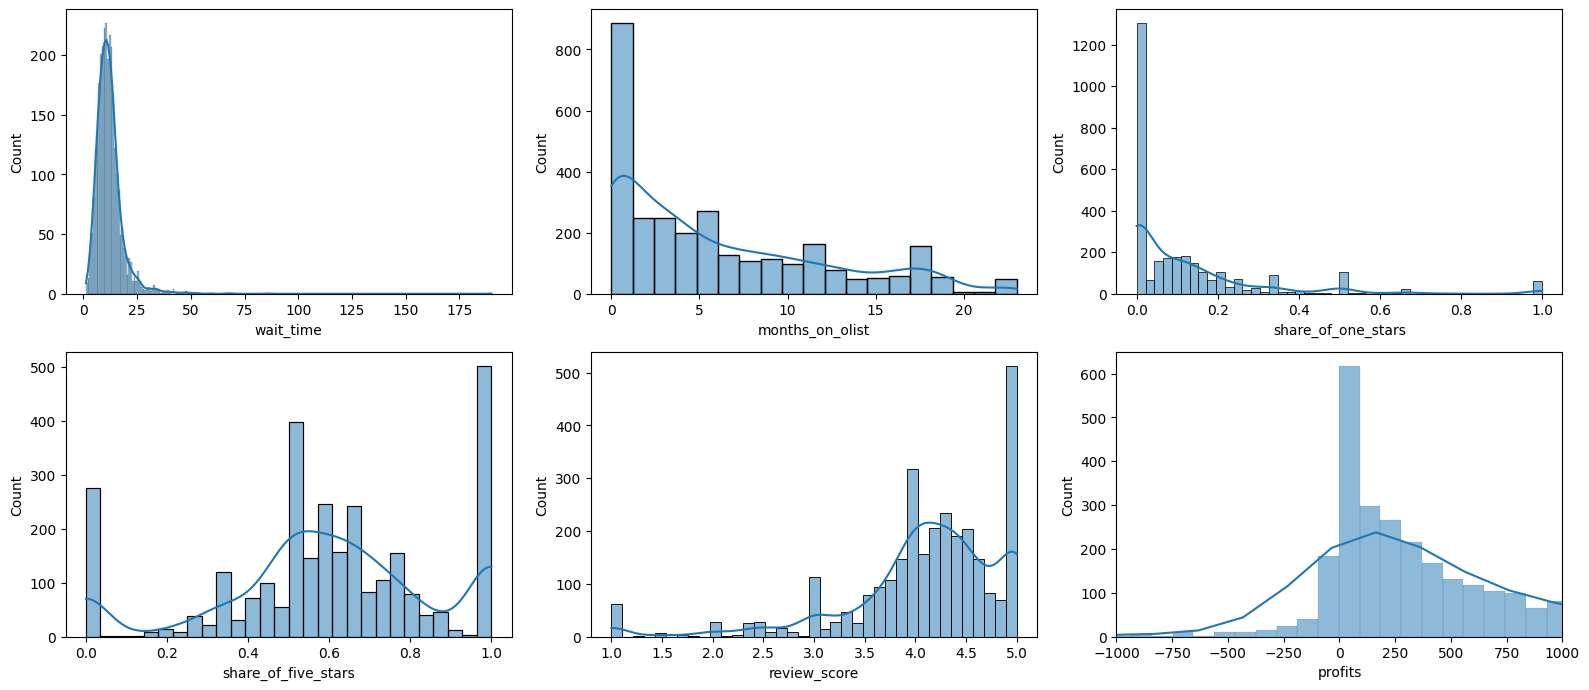

In [125]:
plt.figure(figsize=(16, 10))
for i, column in enumerate(seller):
    plt.subplot(3, 3, i + 1) 
    sns.histplot(seller[column], kde=True)  
plt.xlim(xmin = -1000, xmax=1000)
plt.tight_layout()
plt.show();


❓What insights can we gather from these graphs?


💡Firstly, we have a high volume of new customers. 
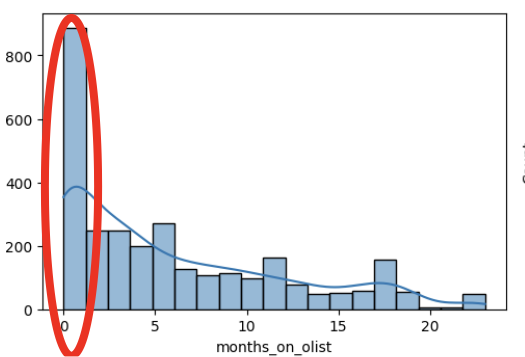






And as you can see, the problem is not with the new sellers.


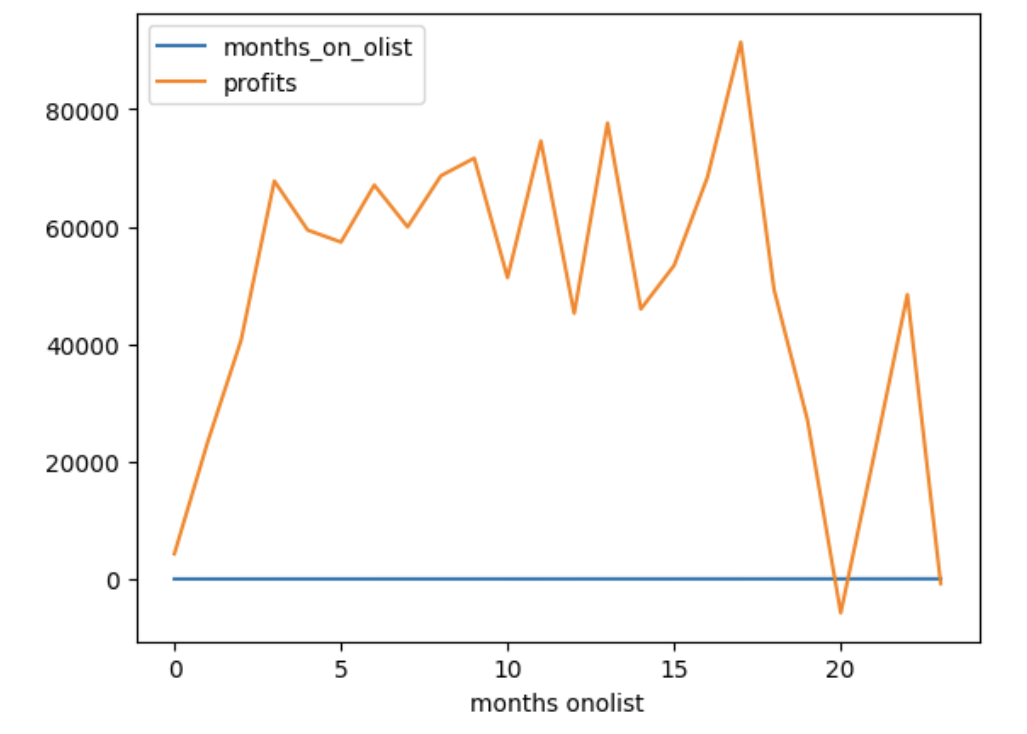




💡Then, the majority of sellers do not have bad reviews; only a small portion of them had a significant percentage of one star. 
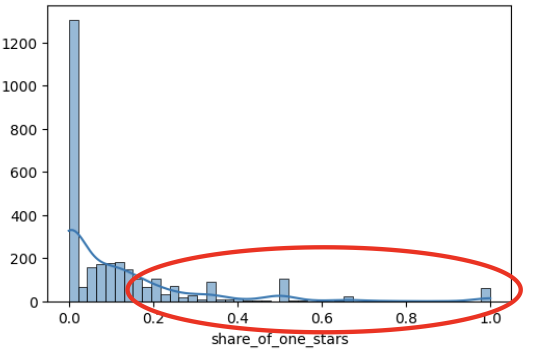





💡There is a cluster of sellers with ratings below 3 stars. 

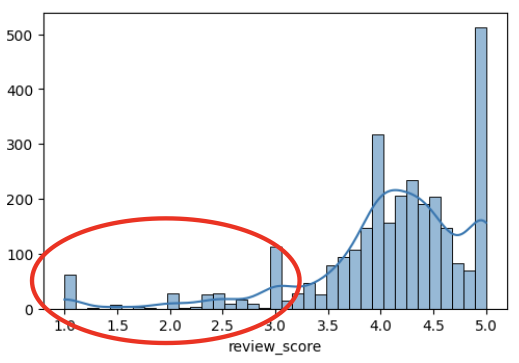




Additionally, we observe that, on average, our sellers generate profits ranging from 0 to 250 B. 

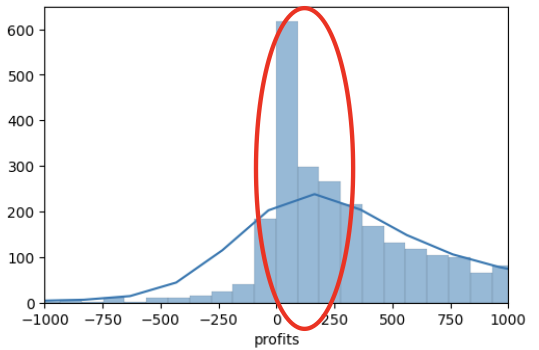






💡However, there is also a subgroup of sellers who contribute to our overall loss in profit. 

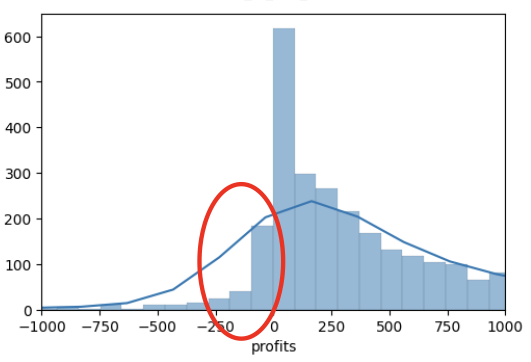

❗️Let's concentrate on this subgroup.


In [34]:
count_below_profit = len(Seller().get_training_data()) - len(remove_sellers(0))
count_below_profit

376

<p><strong>We have exactly 376 sellers who generate losses for us.</strong></p>

<p><span style="text-decoration: underline;">How does this relate to our financial performance?</span></p>


In [38]:
xx = []
n = 1 
x = 377 
for i in range(n,x,10):
    xx.append(i)

In [96]:
it_cost_for_del_sellers = []
revenues_for_del_sellers = []
profits_for_del_sellers = []

for i in xx:
    df = remove_sellers_rows(i)
    it_cost_for_del_sellers.append(it_costs(df))
    revenues_for_del_sellers.append(revenue(df))
    profits_for_del_sellers.append(profit(df))    

In [97]:
list_tuples = list(zip(xx, it_cost_for_del_sellers,revenues_for_del_sellers, profits_for_del_sellers))  

In [98]:
dframe = pd.DataFrame(list_tuples, columns=['num_del_sellers', 'it_costs', 'revenues', 'profit'])

dframe

,num_del_sellers,it_costs,revenues,profit
0,1,496991,2772048,1189128
1,11,479294,2678174,1299784
2,21,471485,2638205,1343715
3,31,462653,2590727,1374637
4,41,456359,2551600,1395660
5,51,451301,2521340,1411880
6,61,447366,2500174,1422924
7,71,444941,2485002,1431532
8,81,439986,2454331,1438441
9,91,438256,2443795,1443705


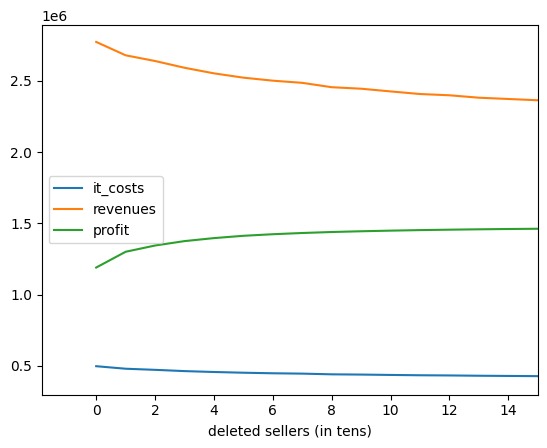

In [124]:
dframe[['it_costs', 'revenues','profit']].plot()
plt.xlabel('deleted sellers (in tens)')
plt.xlim(xmax = 15);

Here we can identify the breaking point - the number of sellers that need to be blocked to stop losing money.

In [100]:

next_prof = dframe['profit'][1:]
next_prof = next_prof.reset_index(drop=True)
cur_prof = dframe['profit'][0:371]

In [101]:
dframe['boosting'] = ((next_prof / cur_prof) - 1) *100

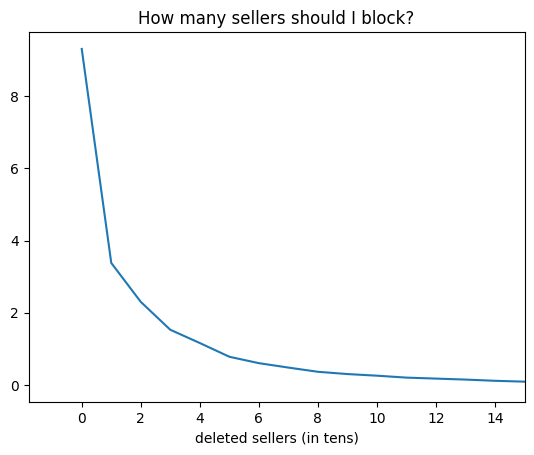

In [123]:
dframe['boosting'].plot()
plt.xlim(xmax = 15)
plt.xlabel('deleted sellers (in tens)')
plt.title('How many sellers should I block?');

What is our current total profit?

Profit is made up of revenue and losses.

In [103]:
Seller().get_training_data()['revenues'].sum()

2785818.444

In [104]:
it_costs(Seller().get_training_data())

499999

In [105]:
Seller().get_training_data()['profits'].sum()


1167608.4440000001

In [106]:

Seller().get_training_data()['cost_of_reviews'].sum()

1618210

Our current profit is : 667 609 B


<hr />
P.S.:

Our revenue         = 2 785 818 B

Cost of bad reviews = -1 618 210 B

IT costs            = -499 999 B

What if we only timely detected and blocked <strong>15 sellers<strong>?

In [107]:
new_df = remove_sellers_rows(15)


In [108]:
new_df['revenues'].sum()

2665603.028

In [109]:
it_costs(new_df)

476797

In [111]:

new_df['cost_of_reviews'].sum()

1345940

In [110]:
new_df['profits'].sum()


1319663.028

Our profit can be : <p><strong> 842 866 B     --->  ❗️ALMOST 200 000 or 26% MORE!</strong></p>

<hr />
P.S.:

Our revenue = 2 665 603 B            --> slightly low

Cost of bad reviews = - 1 345 940 B  --> significantly lower

IT costs = -476 797 B                --> slightly low


In [126]:
1319663.028 - 476797

842866.0279999999

In [120]:
842866/ 667609

1.2625144358449332

In [119]:
a = 667609*1.27
a

847863.43

Product line analysis in progress! 🕓